In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.integrate import quad
import warnings
from scipy.optimize import fmin
from ipywidgets import *
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
# 환경설정
pd.set_option('mode.chained_assignment', None)
plt.style.use('default')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
if not any([s == 'result' for s in os.listdir('.')]): os.mkdir('result')
if not any([s == 'img' for s in os.listdir('.')]): os.mkdir('img')
warnings.filterwarnings('ignore')

In [4]:
실적_가공 = pd.read_excel('data/Package Insurance Policy_분석결과_20201105180152.xlsx')

In [5]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# df1 = 실적_가공.groupby(['증권번호', 'UY']).apply(lambda x: x['증권번호'].unique().shape[0]).reset_index(name='건수').groupby('UY')['건수'].sum()
# df1.plot(kind='bar', ax=ax[0], color='tomato')
# ax[0].legend()
# ax[0].set_title('일반보험 UY별 원수 보험료', fontsize=15)
# ax[0].set_xlabel('UY', fontsize=15)
# ax[0].set_ylabel('보험료(억원)', fontsize=15)
# ax[0].tick_params(rotation=0, labelsize=15)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# ax[0].set_yticks(np.arange(0, 1200, 200))
# ax[0].yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')

# df2 = 실적_가공.groupby(['증권번호', 'UY'])['원수보험료'].sum().reset_index().groupby('UY')['원수보험료'].sum()
# df2.plot(kind='bar', ax=ax[1], color='tomato')
# ax[1].legend()
# ax[1].set_title('일반보험 UY별 원수 보험료', fontsize=15)
# ax[1].set_xlabel('UY', fontsize=15)
# ax[1].set_ylabel('보험료(억원)', fontsize=15)
# ax[1].tick_params(rotation=0, labelsize=15)
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# # ax[1].set_yticks(np.arange(0, 1200, 200))
# ax[1].yaxis.set_major_formatter(lambda x, _: f'{x:,.0f}')

# plt.tight_layout()
# # plt.savefig('img/매출')
# plt.show()

In [6]:
# fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# df = 실적_가공.groupby(['증권번호', 'UY', '당사보험가입금액'])['원수보험료'].sum().reset_index() \
#     .groupby('UY')[['원수보험료', '당사보험가입금액']].sum() \
#     .eval('요율 = 원수보험료/당사보험가입금액*100')
# df['요율'].plot(kind='line', marker='o', ax=ax[0], color='orangered')
# ax[0].set_title('패키지보험 UY별 요율', fontsize=15)
# ax[0].set_xlabel('UY', fontsize=15)
# ax[0].set_ylabel('요율(%)', fontsize=15)
# ax[0].tick_params(rotation=0, labelsize=15)
# ax[0].spines['top'].set_visible(False)
# ax[0].spines['right'].set_visible(False)
# for x in range(len(df)):
#     ax[0].text(x-0.2, df['요율'][x], f'{df["요율"][x]:,.3f}', color='white', fontsize=12, fontweight='bold', bbox={'pad': 0.3, 'color': 'orangered', 'boxstyle': 'circle'})

# df = 실적_가공.query('총보험가입금액 > 2e10').groupby(['증권번호', 'UY', '공동인수율', '당사보험가입금액', '총보험가입금액'])[['원수보험료', '원수경과보험료', '원수손해액', '임의출재보험료', '임의출재경과보험료', '임의출재손해액', '임의출재수수료']].sum().reset_index() \
#         .eval('조정원수보험료 = 원수보험료/공동인수율') \
#         .eval('요율 = 원수보험료/당사보험가입금액*100') \
#         .assign(총보험가입금액_log = lambda x: np.log(x.총보험가입금액)) \
#         .assign(조정원수보험료_log = lambda x: np.log(x.조정원수보험료))
# sns.scatterplot(x='총보험가입금액_log', y='조정원수보험료_log', data=df, s=20, ax=ax[1])
# X_train = sm.add_constant(df['총보험가입금액_log'])
# y_train = df['조정원수보험료_log']
# model = sm.OLS(y_train, X_train)
# res = model.fit()
# const, beta = res.params
# sigma = res.mse_resid
# X_pred = np.linspace(23.7, 33, 100)
# y_pred = res.predict(sm.add_constant(np.linspace(23.7, 33, 100)))
# plt.plot(X_pred, y_pred, color='black', alpha=1, linestyle='dashed', lw=3)
# plt.plot(X_pred, y_pred+1.96*sigma, color='crimson', alpha=1, linestyle='dashed', lw=2)
# plt.plot(X_pred, y_pred-1.96*sigma, color='crimson', alpha=1, linestyle='dashed', lw=2)
# ax[1].set_title('패키지보험 가입금액별 보험료 산포도(UY\'15 ~ UY\'20.3Q)', fontsize=15)
# ax[1].set_xlabel('log(가입금액(S))', fontsize=15)
# ax[1].set_ylabel('log(보험료(P))', fontsize=15)
# ax[1].tick_params(rotation=0, labelsize=15)
# ax[1].set_xlim([23.6, 33])
# ax[1].set_ylim([7.5, 20])
# ax[1].spines['top'].set_visible(False)
# ax[1].spines['right'].set_visible(False)
# ax[1].text(28, 9.5, f"""
#     $ln(P) = {beta:.2f}·ln(S) - {-const:.2f} + ε$\n\
#     $\epsilon$ ~ $N(0, {sigma:,.2f}^2)$
# """, size=15, weight='bold')
    
# plt.tight_layout()
# plt.savefig('img/요율')
# plt.show()

In [7]:
# # fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# df = 실적_가공.groupby(['UY'])[['원수보험료', '출재보험료', '임의출재보험료', '특약출재보험료']].sum() \
#     .eval('출재율 = 출재보험료/원수보험료') \
#     .eval('특약출재율 = 특약출재보험료/원수보험료') \
#     .eval('임의출재율 = 임의출재보험료/원수보험료')
# df['특약출재율'].plot(marker='o')
# df['임의출재율'].plot(marker='o')
# df['출재율'].plot(marker='o')
# plt.legend()
# plt.tight_layout()
# plt.savefig('img/출재율')

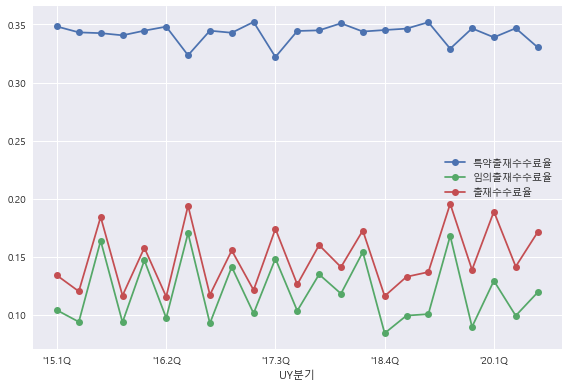

In [16]:
tmp = 실적_가공.groupby(['UY분기'])[['출재보험료', '임의출재보험료', '특약출재보험료', '출재수수료', '임의출재수수료', '특약출재수수료']].sum() \
    .eval('출재수수료율 = 출재수수료/출재보험료') \
    .eval('특약출재수수료율 = 특약출재수수료/특약출재보험료') \
    .eval('임의출재수수료율 = 임의출재수수료/임의출재보험료')
tmp['특약출재수수료율'].plot(marker='o')
tmp['임의출재수수료율'].plot(marker='o')
tmp['출재수수료율'].plot(marker='o')
plt.legend()
plt.tight_layout()
plt.savefig('img/출재수수료율')

In [18]:
@interact
def show(기준=IntSlider(value=1.2e12, step=1e11, max=2e13, min=1e11)):
    실적_가공['가입금액그룹'] = np.where(실적_가공['총보험가입금액'] < 기준, f'{int(기준/1e8):,.0f}억원이하', f'{int(기준/1e8):,.0f}억원초과')
    a = 실적_가공.loc[lambda x: x.UY분기.isin(['\'19.4Q', '\'20.1Q', '\'20.2Q'])] \
        .groupby('가입금액그룹') \
        [['총보험가입금액', '당사보험가입금액', '원수보험료', '원수경과보험료', '원수손해액',
          '출재보험료', '출재경과보험료', '출재손해액', '출재수수료',
          '특약출재보험료', '특약출재경과보험료', '특약출재손해액', '특약출재수수료',
          '임의출재보험료', '임의출재경과보험료', '임의출재손해액', '임의출재수수료']].sum()
    a.loc['합계'] = a.sum()
    a /= 1e8
    a = a.eval('공동인수율 = 당사보험가입금액/총보험가입금액')
    a = a.eval('원수손해율 = 원수손해액/원수경과보험료')
    a = a.eval('출재율 = 출재보험료/원수보험료')
    a = a.eval('출재손해율 = 출재손해액/출재경과보험료')
    a = a.eval('출재수수료율 = 출재수수료/출재보험료')
    a = a.eval('출재합산비율 = 출재손해율+출재수수료율')
    a = a.eval('특약출재율 = 특약출재보험료/원수보험료')
    a = a.eval('특약출재손해율 = 특약출재손해액/특약출재경과보험료')
    a = a.eval('특약출재수수료율 = 특약출재수수료/특약출재보험료')
    a = a.eval('특약출재합산비율 = 특약출재손해율+특약출재수수료율')
    a = a.eval('임의출재율 = 임의출재보험료/원수보험료')
    a = a.eval('임의출재손해율 = 임의출재손해액/임의출재경과보험료')
    a = a.eval('임의출재수수료율 = 임의출재수수료/임의출재보험료')
    a = a.eval('임의출재합산비율 = 임의출재손해율+임의출재수수료율')
#     a = a.eval('임의출재비중 = 임의출재보험료/출재보험료')
    a = a.drop(['총보험가입금액', '당사보험가입금액'], axis=1)
    display(a.T)

interactive(children=(IntSlider(value=1200000000000, description='기준', max=20000000000000, min=100000000000, s…

In [19]:
@interact
def show(지표=['원수보험료', '원수경과보험료', '원수손해액', '출재보험료', '출재경과보험료', '출재손해액'], 기준=IntSlider(value=1.2e12, step=1e11, max=2e12, min=1e11)):
    실적_가공['가입금액그룹'] = np.where(실적_가공['총보험가입금액'] < 기준, f'{int(기준/1e8)}억원이하', f'{int(기준/1e8)}억원초과')
    실적_가공 \
        .groupby('가입금액그룹')[['원수보험료', '원수경과보험료', '원수손해액', '출재보험료', '출재경과보험료', '출재손해액']].sum() \
        .plot(kind='pie', y=지표)

interactive(children=(Dropdown(description='지표', options=('원수보험료', '원수경과보험료', '원수손해액', '출재보험료', '출재경과보험료', '출재…

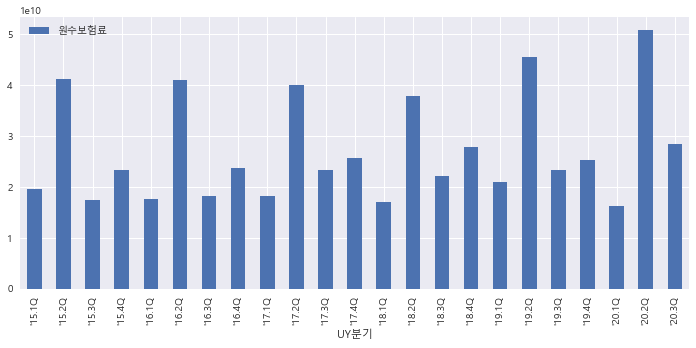

In [20]:
fig, ax = plt.subplots(figsize=(12, 5))
실적_가공.groupby('UY분기')[['원수보험료']].sum().plot(kind='bar', ax=ax)
plt.show()

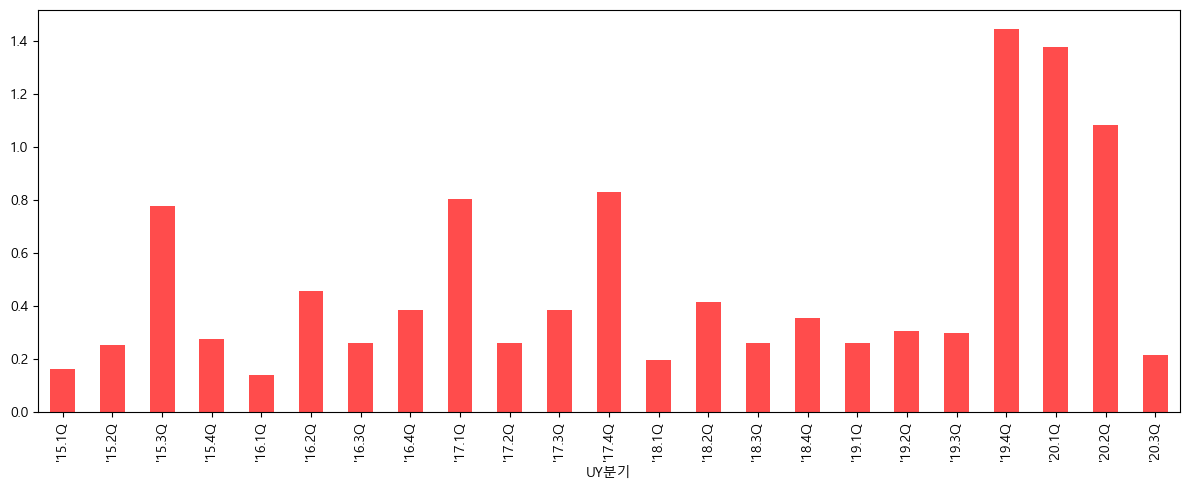

In [324]:
fig, ax = plt.subplots(figsize=(12, 5))

실적_가공.groupby('UY분기')[['원수보험료', '원수경과보험료', '원수손해액']].sum() \
    .eval('원수손해율 = 원수손해액/원수경과보험료') \
    [['원수손해율']] \
    .plot(kind='bar', ax=ax, color='red', alpha=0.7, legend=None)
plt.tight_layout()
plt.savefig('img/원수손해율')
plt.show()

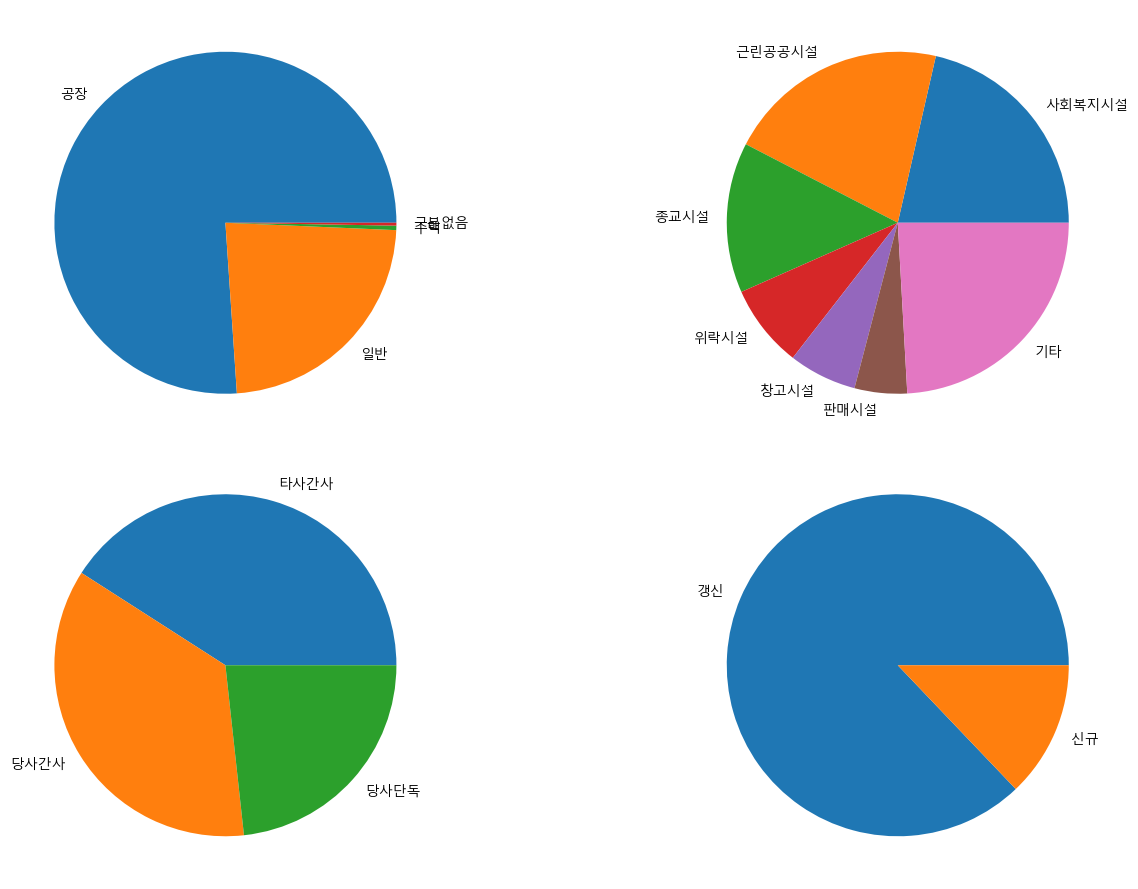

In [100]:
fig, ax = plt.subplots(2, 2, figsize=(15, 9))

지표 = '원수보험료'

df = 실적_가공.groupby('물건구분명')[지표].sum().sort_values(ascending=False)
df.plot(kind='pie', y='원수보험료', ax=ax[0][0])
ax[0][0].set_ylabel(None)

df = 실적_가공.groupby('화재업종대분류명')[[지표]].sum().sort_values(by=지표, ascending=False).reset_index()
화재업종순서 = df.iloc[:6, 0].tolist() + ['기타']
화재업종기타 = df.iloc[6:].index
df.loc[lambda x: x.index.isin(화재업종기타), '화재업종대분류명'] = '기타'
df = df.groupby('화재업종대분류명')[지표].sum()[화재업종순서]
df.plot(kind='pie', y=지표, ax=ax[0][1])
ax[0][1].set_ylabel(None)

df = 실적_가공.groupby('공동인수구분명')[지표].sum().sort_values(ascending=False)
df.plot(kind='pie', y=지표, ax=ax[1][0])
ax[1][0].set_ylabel(None)

# df = 실적_가공.groupby('보험사명')[[지표]].sum().sort_values(by=지표, ascending=False).reset_index()
# 보험사명순서 = df.iloc[:6, 0].tolist() + ['기타']
# 보험사명기타 = df.iloc[6:].index
# df.loc[lambda x: x.index.isin(보험사명기타), '보험사명'] = '기타'
# df = df.groupby('보험사명')[지표].sum()[보험사명순서]
# df.plot(kind='pie', y=지표, ax=ax[1][0])
# ax[1][0].set_ylabel(None)

df = 실적_가공.groupby('갱신구분명')[지표].sum()
df.plot(kind='pie', y=지표, ax=ax[1][1])
ax[1][1].set_ylabel(None)

plt.tight_layout()
plt.show()

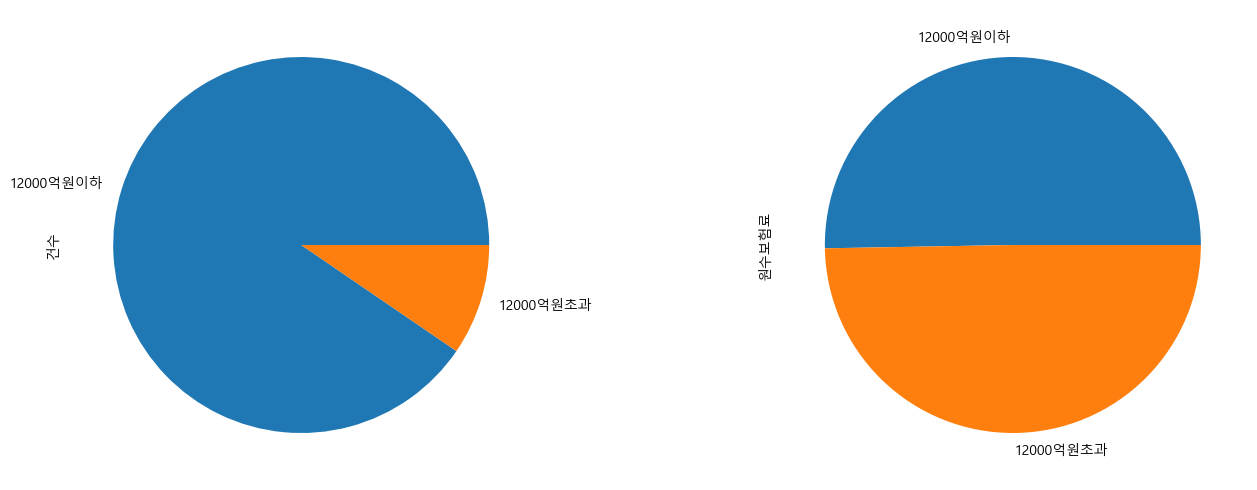

In [319]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
지표 = [
    '원수보험료', '원수경과보험료','원수손해액',
    '출재보험료', '출재경과보험료', '출재손해액', '출재수수료',
    '특약출재보험료', '특약출재경과보험료', '특약출재손해액', '특약출재수수료',
    '임의출재보험료', '임의출재경과보험료', '임의출재손해액', '임의출재수수료'
]

df = 실적_가공.groupby(['증권번호', '가입금액그룹'])[지표].sum().reset_index()
건수 = df.groupby('가입금액그룹').size()
df = df.groupby('가입금액그룹')[지표].sum()
df['건수'] = 건수
df = df.eval('출재수지손 = 출재경과보험료 - 출재손해액 + 출재수수료') \
    .eval('특약출재수지손 = 특약출재경과보험료 - 특약출재손해액 + 특약출재수수료') \
    .eval('임의출재수지손 = 임의출재경과보험료 - 임의출재손해액 + 임의출재수수료') \
    .eval('출재율 = 출재보험료/원수보험료*100') \
    .eval('특약출재율 = 특약출재보험료/원수보험료*100') \
    .eval('임의출재율 = 임의출재보험료/원수보험료*100') \
    .eval('원수손해율 = 원수손해액/원수경과보험료*100') \
    .eval('출재손해율 = 출재손해액/출재경과보험료*100') \
    .eval('특약출재손해율 = 특약출재손해액/특약출재경과보험료*100') \
    .eval('임의출재손해율 = 임의출재손해액/임의출재경과보험료*100') \
    .eval('출재수수료율 = 출재수수료/출재보험료*100') \
    .eval('특약출재수수료율 = 특약출재수수료/특약출재보험료*100') \
    .eval('임의출재수수료율 = 임의출재수수료/임의출재보험료*100')
df['건수'].plot(kind='pie', ax=ax[0])
df['원수보험료'].plot(kind='pie', ax=ax[1])

plt.tight_layout()
plt.show()

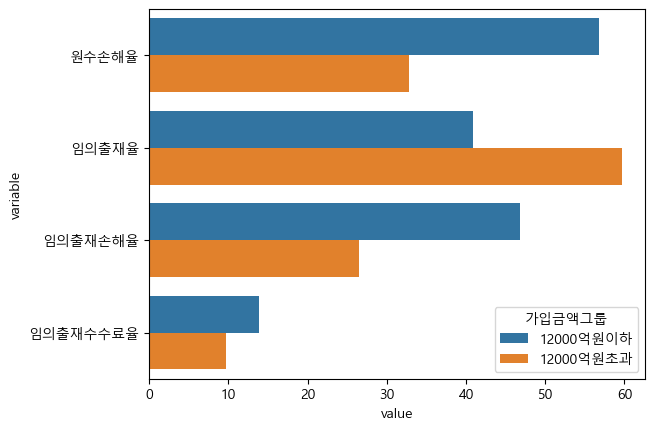

In [374]:
sns.barplot(y='variable', x='value', data=df[['원수손해율', '임의출재율', '임의출재손해율', '임의출재수수료율']].reset_index().melt(id_vars='가입금액그룹'), hue='가입금액그룹')

In [382]:
@interact
def show(지표=['원수보험료', '원수경과보험료', '원수손해액']):
    기준 = 1.2e12
    실적_가공['가입금액그룹'] = np.where(실적_가공['총보험가입금액'] < 기준, f'{int(기준/1e8)}억원이하', f'{int(기준/1e8)}억원초과')
    fig, ax = plt.subplots(2, 3, figsize=(15, 10))

    실적_가공.groupby('물건구분명')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[0][0])

    실적_가공.groupby('화재업종대분류명')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[0][1])

    실적_가공.groupby('보험사명')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[0][2])

    실적_가공.groupby('공동인수구분명')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[1][0])
    
    실적_가공.groupby('갱신구분명')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[1][1])
    
    실적_가공.groupby('가입금액그룹')[[지표]].sum() \
        .plot(kind='pie', y=지표, ax=ax[1][2])

    plt.tight_layout()
    plt.savefig('img/특성별')
    plt.show()

interactive(children=(Dropdown(description='지표', options=('원수보험료', '원수경과보험료', '원수손해액'), value='원수보험료'), Output…

In [26]:
@interact
def show(대분류 = 화재업종코드['화재업종대분류명'].unique(), 지표=['원수보험료', '원수경과보험료', '원수손해액']):
    실적_가공.query('화재업종대분류명 == @대분류').groupby('UY분기')[['원수보험료', '원수경과보험료', '원수손해액']].sum() \
        .eval('원수손해율 = 원수손해액/원수경과보험료')[[지표]] \
        .plot(kind='bar')

interactive(children=(Dropdown(description='대분류', options=('근린생활시설', '근린공공시설', '종교시설', '사회복지시설', '위락시설', '관람집회…

In [ ]:
# 출력
now = datetime.now().strftime('%Y%m%d%H%M%S')
with pd.ExcelWriter(f'result/{파일명}_분석결과_{now}.xlsx', 'xlsxwriter') as writer:
    실적_가공.to_excel(writer, '실적_가공', index=False)